# Mini Hadron Collider

### Twiss and Survey

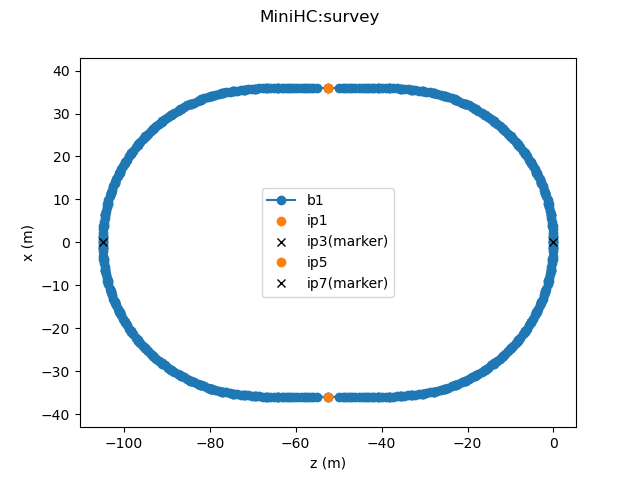

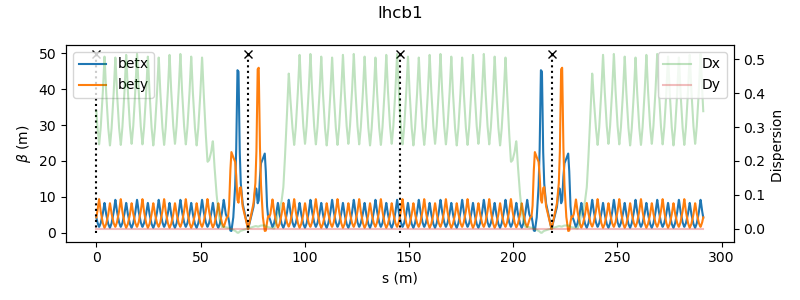

In [1]:
import subprocess
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from cpymad.madx import Madx


# Importing LHC sequences:
with open('Shareables/madx_input.mad', 'w') as f:
    mad = Madx(stdout=f)
    mad.option(echo = True, warn = True)
    mad.call(file='Backend/MAD/MiniHC.mad')


    mad.command.beam(particle='proton',sequence='lhcb1',charge=1,npart=1,energy=7000,bv=1)

    mad.input('use,sequence=lhcb1')
    if True:
        twiss  = {}
        survey = {}
        for seq in ['lhcb1']:

            mad.sequence[seq].use()
            #mad.twiss()
            mad.survey()
            #twiss[seq[-2:]]  = mad.table['twiss'].dframe()
            survey[seq[-2:]] = mad.table['survey'].dframe()
            
%matplotlib widget

plt.figure()
plt.suptitle('MiniHC:survey')
for beam in ['b1']:
    plt.plot(survey[beam]['x'],survey[beam]['z'],'-o',label=beam)
    for _IP in ['ip1','ip3','ip5','ip7']:
        if _IP in survey[beam].index:
            if _IP in 'ip3 | ip7':
                plt.plot(survey[beam].loc[_IP,'x'],survey[beam].loc[_IP,'z'],'x',color='k',label=_IP + '(marker)')
            else:
                plt.plot(survey[beam].loc[_IP,'x'],survey[beam].loc[_IP,'z'],'o',color='C1',label=_IP )
plt.legend()
plt.axis('equal')
plt.xlabel('z (m)')
plt.ylabel(r'x (m)')




seq = 'lhcb1'
mad.input(f'use,sequence={seq};')
mad.twiss()
_twiss = mad.table['twiss'].dframe()

plt.figure(figsize=(8,3))
plt.suptitle(seq)
plt.plot(_twiss['s'],_twiss['betx'],label='betx')
plt.plot(_twiss['s'],_twiss['bety'],label='bety')
for _IP in ['ip1','ip3','ip5','ip7']:
    plt.stem(_twiss.loc[_IP,'s'],1.1*np.max(_twiss['betx']),markerfmt='kx',linefmt='k:')


plt.legend(loc='upper left')
plt.xlabel('s (m)')
plt.ylabel(r'$\beta$ (m)')

ax2 = plt.gca().twinx()
plt.sca(ax2)
plt.plot(_twiss['s'],_twiss['dx'],alpha=0.3,color='C2',label='Dx')
plt.plot(_twiss['s'],_twiss['dy'],alpha=0.3,color='C3',label='Dy')
plt.legend(loc='upper right')
plt.ylabel(r'Dispersion ')
plt.tight_layout()



### Exporting sequence

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1.seq",
        BEAM     = true;''')

True

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1_bare.seq",
        BARE     = true;''')

True

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1_strengths.seq",
        CSAVE    = true;''')

True